In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -d

Sebastian Raschka 06/21/2015 

CPython 3.4.3
IPython 3.1.0


#Activation Functions Cheatsheet

Linear:  $$g(z) = z$$ 

Unit step: $$g(z) = \begin{cases} 0 & z < 0, \\ 1 & z \ge 0 \end{cases}$$

logistic (sigmoid): $$g(z) = \frac{1}{1 + e^{-z}}$$

hyperbolic tangent (sigmoid): $$g(z) = tanh(z) = \frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$$


Piecewise linear: $$g(z) = \begin{cases}
 1 & \mbox{for } z \geq \frac{1}{2} \\
 z + \frac{1}{2} & \mbox{for } -\frac{1}{2} < z < \frac{1}{2} \\
 0 & \mbox{for } z \leq -\frac{1}{2}
 \end{cases}$$

In [2]:
import numpy as np
def activation(z, kind):
    
    implemented = ('linear', 'unit step', 'logistic', 'piecewise linear', 'tanh')
    if kind not in implemented:
        raise AttributeError('%s not in %s' % (kind, implemented))
    
    if kind == 'unit step':
        return np.where(z >= 0.0, 1, 0)
    
    elif kind == 'logistic':
        return 1.0 / (1.0 + np.exp(-z))
    
    elif kind == 'tanh':
        e_p = np.exp(z) 
        e_m = np.exp(-z)
        return (e_p - e_m) / (e_p + e_m)  
    
    elif kind == 'piecewise linear':
        if z >= 0.5:
            return 1
        elif z <= -0.5:
            return 0
        else:
            return z + 0.5
        
    else:
        return z

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

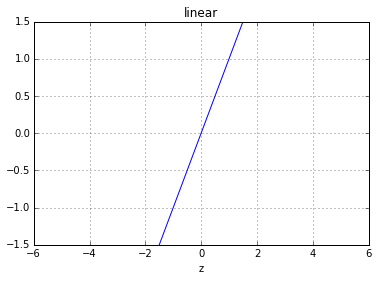

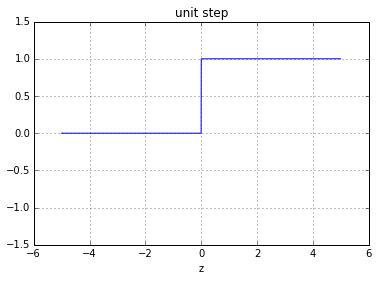

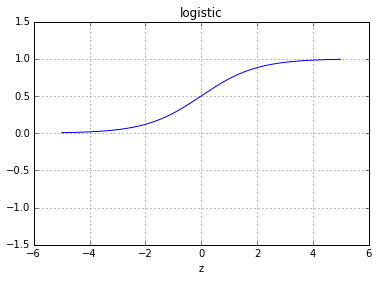

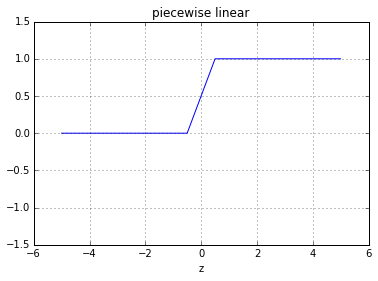

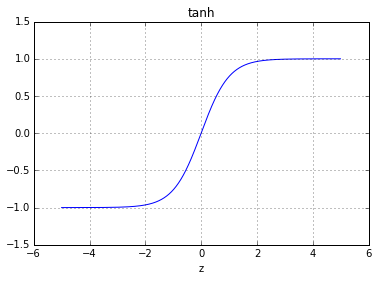

In [4]:
x = np.arange(-5, 5, 0.005)
for a in ('linear', 'unit step', 'logistic', 'piecewise linear', 'tanh'):
    y = [activation(z, kind=a) for z in x]
    plt.plot(x, y)
    plt.title(a)
    plt.ylim([-1.5, 1.5])
    plt.xlabel('z')
    plt.grid()
    plt.show()